In [ ]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn import tree
import pandas as pd
import numpy as np
import seaborn as sn
import json
import pickle

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def write_file(path,data):
  with open(path, 'w') as fp:
      json.dump(data, fp,indent=4)

In [ ]:
def get_symptoms(df):
  all_symptoms = set()
  columns = df.columns[1:]
  for column in columns:
    for symptom in df[column].unique():
        if symptom:
          all_symptoms.add(symptom.strip())
  return list(all_symptoms)

In [ ]:
def create_symptom_mapping(all_symptoms):
  symptom_number_mapping = {}
  for index,symptom in enumerate(all_symptoms):
    symptom_number_mapping[symptom] = index
  return symptom_number_mapping

In [ ]:
def get_symptom_mapping(symptom_mapping,symptom):
  return symptom_mapping[symptom.strip()]

In [ ]:
def create_feature_matrix(df,symptom_mapping):
  number_records = df.shape[0]
  number_symptoms = len(symptom_mapping.keys())
  columns = df.columns[1:]
  feature_matrix = np.zeros((number_records,number_symptoms),dtype=int)
  for index, row in df.iterrows():
    for column in columns:
      if row[column]:
        symptom = row[column]
        mapping = get_symptom_mapping(symptom_mapping,symptom)
        feature_matrix[index][mapping] = 1
  return feature_matrix

In [ ]:
def load_data(path):
  return pd.read_csv(path,na_filter=False)

In [ ]:
def create_labels(le,values):
  return le.fit_transform(values)

In [ ]:
def get_label(le,value):
  return le.inverse_transform([value])

In [ ]:
def plot_bar(label,data):
    label = [ l[:10] for l in label]
    index = np.arange(len(label))
    plt.figure(figsize=(40,10))
    plt.bar(index, data)
    plt.xlabel('Disease', fontsize=25)
    plt.ylabel('No of samples', fontsize=25)
    plt.xticks(index,label, fontsize=15, rotation=20)
    plt.show()

In [ ]:
#if __name__ == '__main__':
df = load_data('/content/drive/MyDrive/CMPE 295/Dataset/disease-symptom.csv')
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,,,,,,,,,,,,,
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,,,,,,,,,,,,,,
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,,,,,,,,,,,,,,
3,Fungal infection,itching,skin_rash,dischromic _patches,,,,,,,,,,,,,,
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,,,,,,,,,,,,,,


In [ ]:
symptoms = get_symptoms(df)
print(symptoms)

['abnormal_menstruation', 'anxiety', 'irritability', 'ulcers_on_tongue', 'joint_pain', 'palpitations', 'muscle_pain', 'red_spots_over_body', 'abdominal_pain', 'muscle_weakness', 'pain_in_anal_region', 'mucoid_sputum', 'spinning_movements', 'fluid_overload', 'movement_stiffness', 'acute_liver_failure', 'muscle_wasting', 'depression', 'high_fever', 'skin_rash', 'weakness_in_limbs', 'nodal_skin_eruptions', 'loss_of_appetite', 'stomach_pain', 'restlessness', 'sunken_eyes', 'runny_nose', 'pus_filled_pimples', 'weight_gain', 'excessive_hunger', 'yellowing_of_eyes', 'swollen_legs', 'dehydration', 'fast_heart_rate', 'coma', 'pain_behind_the_eyes', 'continuous_sneezing', 'diarrhoea', 'prominent_veins_on_calf', 'mild_fever', 'bladder_discomfort', 'dischromic _patches', 'swollen_blood_vessels', 'spotting_ urination', 'inflammatory_nails', 'foul_smell_of urine', 'yellow_urine', 'loss_of_smell', 'swollen_extremeties', 'blackheads', 'phlegm', 'hip_joint_pain', 'knee_pain', 'pain_during_bowel_movemen

In [ ]:
mapping = create_symptom_mapping(symptoms)
print(mapping)

{'abnormal_menstruation': 0, 'anxiety': 1, 'irritability': 2, 'ulcers_on_tongue': 3, 'joint_pain': 4, 'palpitations': 5, 'muscle_pain': 6, 'red_spots_over_body': 7, 'abdominal_pain': 8, 'muscle_weakness': 9, 'pain_in_anal_region': 10, 'mucoid_sputum': 11, 'spinning_movements': 12, 'fluid_overload': 13, 'movement_stiffness': 14, 'acute_liver_failure': 15, 'muscle_wasting': 16, 'depression': 17, 'high_fever': 18, 'skin_rash': 19, 'weakness_in_limbs': 20, 'nodal_skin_eruptions': 21, 'loss_of_appetite': 22, 'stomach_pain': 23, 'restlessness': 24, 'sunken_eyes': 25, 'runny_nose': 26, 'pus_filled_pimples': 27, 'weight_gain': 28, 'excessive_hunger': 29, 'yellowing_of_eyes': 30, 'swollen_legs': 31, 'dehydration': 32, 'fast_heart_rate': 33, 'coma': 34, 'pain_behind_the_eyes': 35, 'continuous_sneezing': 36, 'diarrhoea': 37, 'prominent_veins_on_calf': 38, 'mild_fever': 39, 'bladder_discomfort': 40, 'dischromic _patches': 41, 'swollen_blood_vessels': 42, 'spotting_ urination': 43, 'inflammatory_na

In [ ]:
#write_file('drive/My Drive/295/disease_dataset_symptom_id.json',mapping)

In [ ]:
le = preprocessing.LabelEncoder()
X = create_feature_matrix(df,mapping)
y = create_labels(le,df['Disease'].values)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=3)

In [ ]:
print(f"Total number of samples        : {len(X)}")
print(f"Number of samples in trainset  : {len(X_train)}")
print(f"Number of samples in testset   : {len(X_test)}")

Total number of samples        : 4920
Number of samples in trainset  : 3296
Number of samples in testset   : 1624


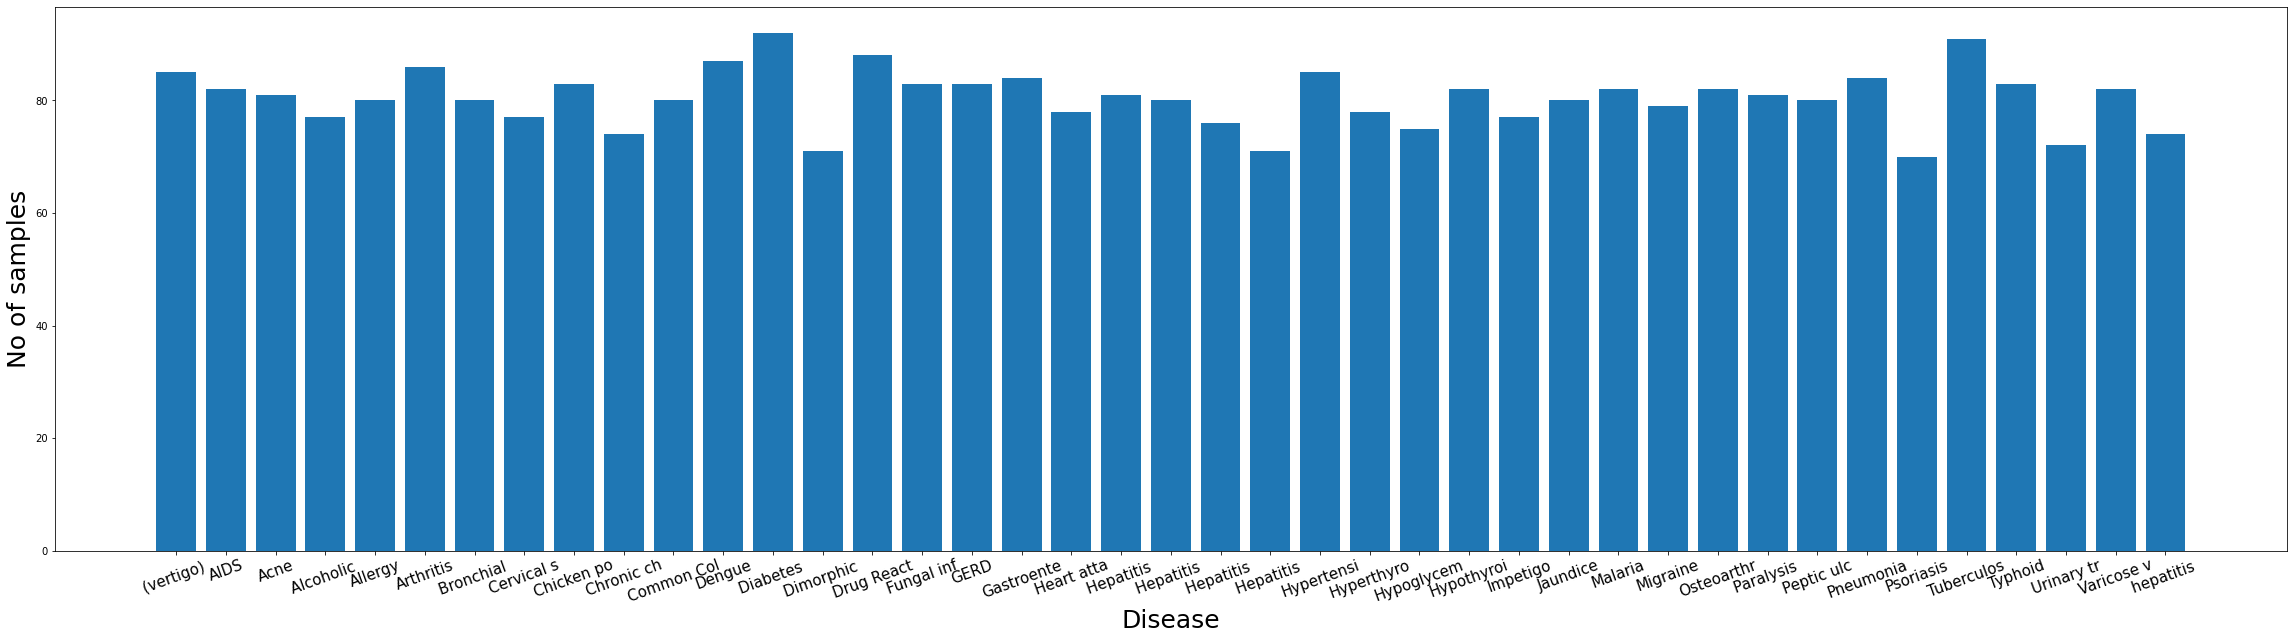

In [ ]:
plot_bar(le.classes_,np.bincount(y_train))

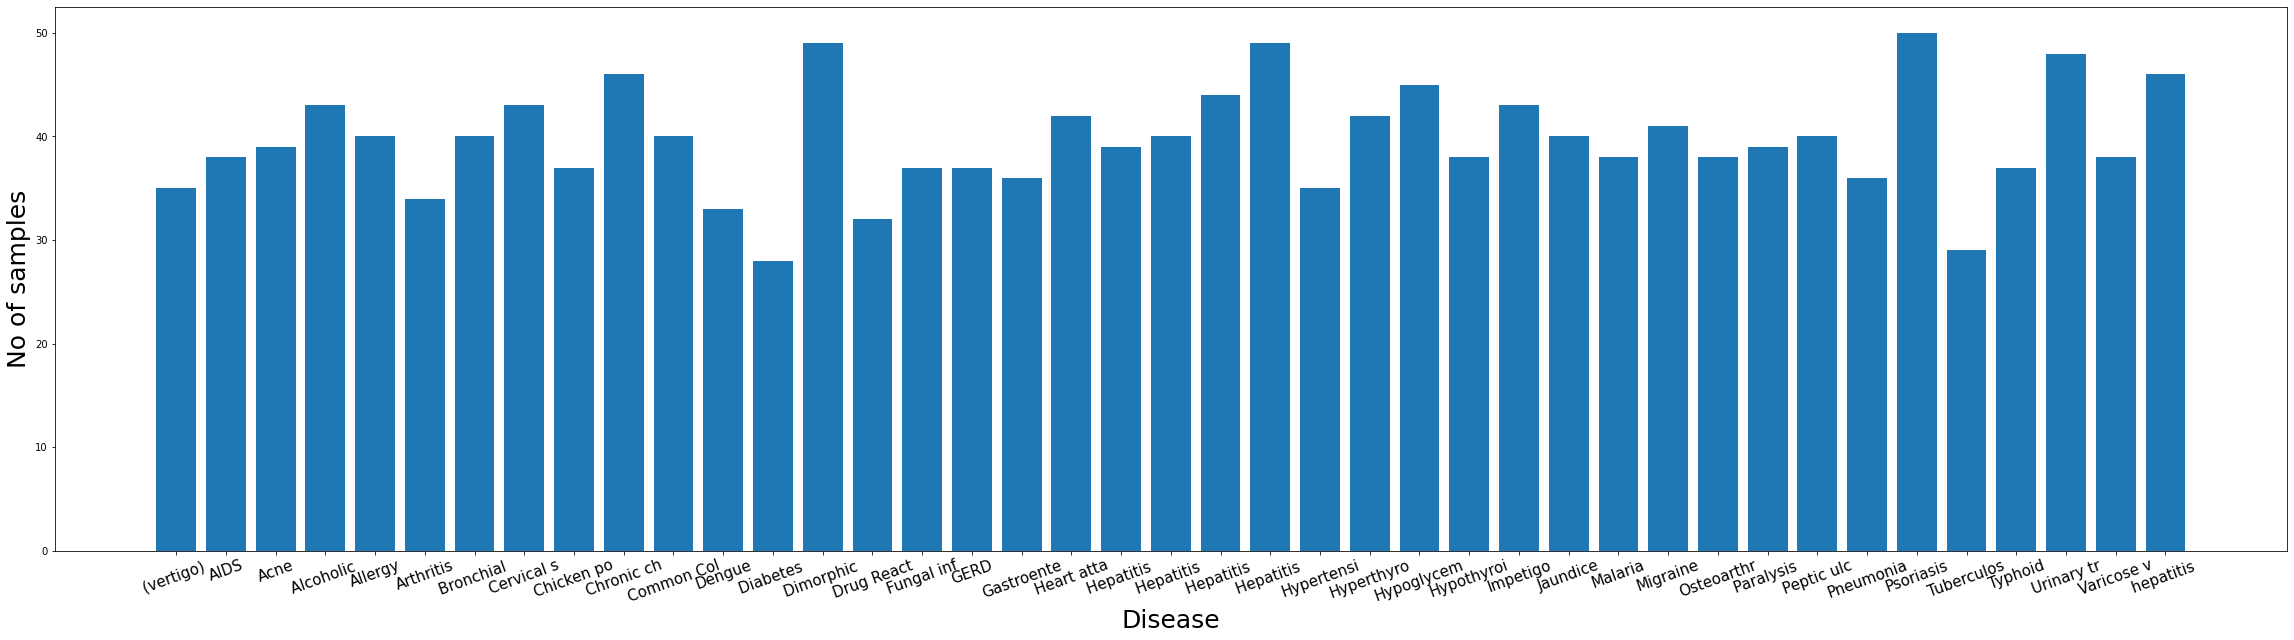

In [ ]:
plot_bar(le.classes_,np.bincount(y_test))

KNN Classifier

In [ ]:
clf_knn = KNeighborsClassifier(n_neighbors=20,algorithm="ball_tree",p=2)
clf_knn.fit(X_train, y_train)
clf_knn_prediction = clf_knn.predict(X_test)
clf_knn.score(X_test,y_test)

1.0

In [ ]:
def plot_grid_search_validation_curve(grid, param_to_vary,
                                      title='Validation Curve', ylim=None,
                                      xlim=None, log=None):
    """Plots train and cross-validation scores from a GridSearchCV instance's
    best params while varying one of those params."""

    df_cv_results = pd.DataFrame(grid.cv_results_)
    train_scores_mean = df_cv_results['mean_train_score']
    valid_scores_mean = df_cv_results['mean_test_score']
    train_scores_std = df_cv_results['std_train_score']
    valid_scores_std = df_cv_results['std_test_score']

    param_cols = [c for c in df_cv_results.columns if c[:6] == 'param_']
    param_ranges = [grid.param_grid[p[6:]] for p in param_cols]
    param_ranges_lengths = [len(pr) for pr in param_ranges]

    train_scores_mean = np.array(train_scores_mean).reshape(*param_ranges_lengths)
    valid_scores_mean = np.array(valid_scores_mean).reshape(*param_ranges_lengths)
    train_scores_std = np.array(train_scores_std).reshape(*param_ranges_lengths)
    valid_scores_std = np.array(valid_scores_std).reshape(*param_ranges_lengths)

    param_to_vary_idx = param_cols.index('param_{}'.format(param_to_vary))

    slices = []
    for idx, param in enumerate(grid.best_params_):
        if (idx == param_to_vary_idx):
            slices.append(slice(None))
            continue
        best_param_val = grid.best_params_[param]
        idx_of_best_param = 0
        if isinstance(param_ranges[idx], np.ndarray):
            idx_of_best_param = param_ranges[idx].tolist().index(best_param_val)
        else:
            idx_of_best_param = param_ranges[idx].index(best_param_val)
        slices.append(idx_of_best_param)

    train_scores_mean = train_scores_mean[tuple(slices)]
    valid_scores_mean = valid_scores_mean[tuple(slices)]
    train_scores_std = train_scores_std[tuple(slices)]
    valid_scores_std = valid_scores_std[tuple(slices)]

    plt.clf()

    plt.title(title)
    plt.xlabel(param_to_vary)
    plt.ylabel('Score')

    if (ylim is None):
        plt.ylim(0.0, 1.1)
    else:
        plt.ylim(*ylim)

    if (not (xlim is None)):
        plt.xlim(*xlim)

    lw = 2

    plot_fn = plt.plot
    if log:
        plot_fn = plt.semilogx

    param_range = param_ranges[param_to_vary_idx]
    if (not isinstance(param_range[0], numbers.Number)):
        param_range = [str(x) for x in param_range]
    plot_fn(param_range, train_scores_mean, label='Training score', color='r',
            lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color='r', lw=lw)
    plot_fn(param_range, valid_scores_mean, label='Cross-validation score',
            color='b', lw=lw)
    plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                     valid_scores_mean + valid_scores_std, alpha=0.1,
                     color='b', lw=lw)

    plt.legend(loc='lower right')

    plt.show()

In [ ]:
leaf_size = list(range(10,11))#list(range(10,20))
n_neighbors = list(range(20,21))#list(range(20,50))
p=[1,2] # 1 - manhattan_distance       2 - euclidean_distance
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
knn_2 = KNeighborsClassifier()
clf = GridSearchCV(knn_2, hyperparameters, cv=10,verbose=3)
best_model = clf.fit(X_train,y_train)
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

**Decision Tree Classifier**

In [ ]:
clf_tree = tree.DecisionTreeClassifier(random_state=0,max_depth=60,criterion="entropy")
clf_tree.fit(X_train, y_train)
clf_tree_prediction = clf_tree.predict(X_test)
clf_tree.score(X_test,y_test)

1.0

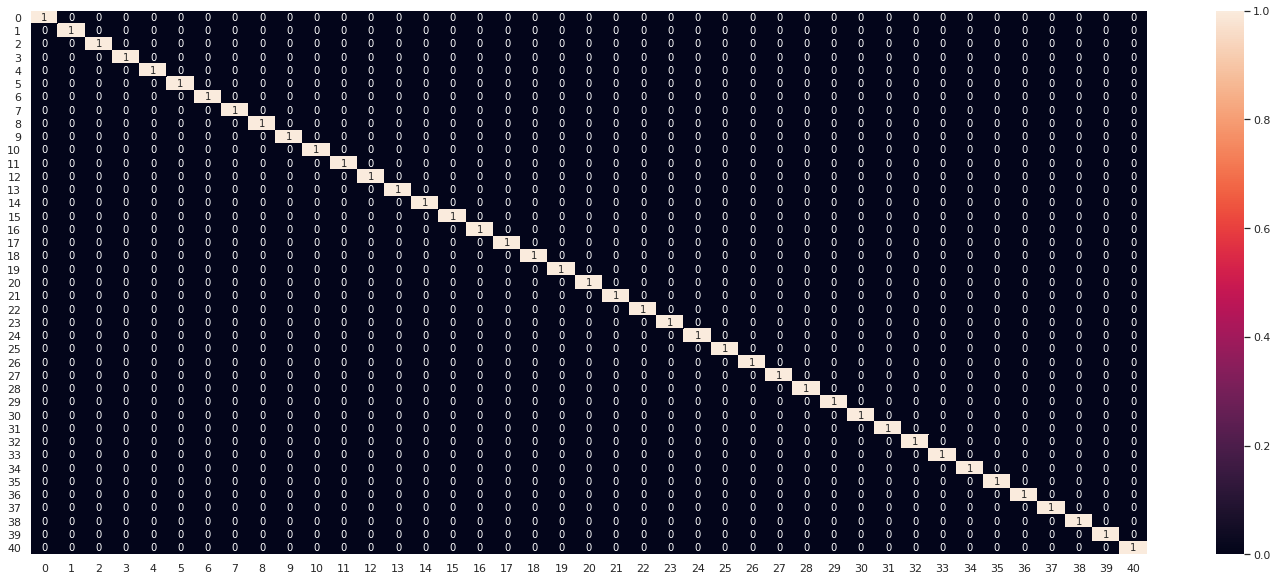

In [ ]:
def createConfusionMatrix(trueLabel,PredictedLabel):
    cm=confusion_matrix(trueLabel,PredictedLabel,normalize="true")
    return np.around(cm, decimals=2)

def plotConfusionMatrix(matrix):
  df_cm = pd.DataFrame(matrix,range(matrix.shape[0]),range(matrix.shape[1]))
  plt.figure(figsize = (25,10))
  sn.set(font_scale=1)
  sn.heatmap(df_cm, annot=True, annot_kws={"size": 10}) 


#Create and plot the confusion matrix
cm = createConfusionMatrix(y_test,clf_knn_prediction)
plotConfusionMatrix(cm)

In [ ]:
def get_evaluation_metric(y_test,y_pred):
  precision_metric = precision_score(y_test, y_pred, average = "macro",zero_division=1)
  recall_metric = recall_score(y_test, y_pred, average = "macro")
  accuracy_metric = accuracy_score(y_test, y_pred)
  f1_metric = f1_score(y_test, y_pred, average = "macro")
  print(f"Precision : {precision_metric} \nRecall : {recall_metric} \nAccuracy : {accuracy_metric} \nF1 metric : {f1_metric}")

In [ ]:
get_evaluation_metric(y_test,clf_knn_prediction)

Precision : 1.0 
Recall : 1.0 
Accuracy : 1.0 
F1 metric : 1.0


In [ ]:
get_evaluation_metric(y_test,clf_tree_prediction)

Precision : 1.0 
Recall : 1.0 
Accuracy : 1.0 
F1 metric : 1.0
